In [42]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv (r'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [8]:
df.nunique()

Company Name                                 439
company contact                              432
company email                                420
company phone                                430
Address                                      421
City                                          38
State                                          1
Postcode                                      96
Industry                                       5
Industry descr                               401
Company Type                                   2
Current fulltime                             158
Job created                                    8
Job retain                                    13
Effective Date                               366
Total Savings                                448
Savings from beginning receiving benefits    450
Borough                                        5
Latitude                                     326
Longitude                                    327
Community Board     

In [9]:
queens = df[df['Borough'] == 'Queens']
queens.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,...,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,...,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
12,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,Eye glasses,...,288983.01,Queens,40.742386,-73.932148,402.0,26.0,199.0,4003447.0,4.002520e+09,Hunters Point-Sunnyside-West Maspeth
14,4Over4.com,Anastasio Panagiotopolous,taso@4over4.com,7189322700,19-41 46th Street,Long Island City,NY,11105,Manufacturing,Printer,...,184923.14,Queens,40.774940,-73.896804,401.0,22.0,12301.0,4441806.0,4.007740e+09,Steinway
15,538-540 West 35 Corp,Richard Silver,tankman220@aol.com,2127366618,11-42 46th Road,Queens,NY,11101,Manufacturing,"steel, wood & cement tanks",...,56744.11,Queens,40.745510,-73.949497,402.0,26.0,7.0,4436616.0,4.000560e+09,Hunters Point-Sunnyside-West Maspeth


In [10]:
test = queens[queens['Job created'].isna() == False]

In [11]:
test['Job created']

29     10.0
37     60.0
137    10.0
324     2.0
433    20.0
Name: Job created, dtype: float64

In [12]:
sums = queens.sum(0)

C:\Users\ericr\AppData\Local\Temp\ipykernel_10896\4039291230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sums = queens.sum(0)


In [13]:
sums

Company Name                                 139 ACA Realty, Inc.14-10 123rd Street LLC21st...
company contact                              Eitan ChandallyDanica/Ivan DrazicRalph Woythal...
company phone                                7187076123718321011771839223107189322700212736...
Address                                      43-23 35th Street14-10 123rd Street47-00 33rd ...
City                                         Long Island CityCollege PointLond Island CityL...
State                                        NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...
Postcode                                                                               1938615
Industry                                     CommercialCommercialManufacturingManufacturing...
Company Type                                 ECSPECSPECSPECSPECSPECSPECSPECSPECSPECSPECSPEC...
Current fulltime                                                                       21384.0
Job created                                       

In [14]:
df.nunique()

Company Name                                 439
company contact                              432
company email                                420
company phone                                430
Address                                      421
City                                          38
State                                          1
Postcode                                      96
Industry                                       5
Industry descr                               401
Company Type                                   2
Current fulltime                             158
Job created                                    8
Job retain                                    13
Effective Date                               366
Total Savings                                448
Savings from beginning receiving benefits    450
Borough                                        5
Latitude                                     326
Longitude                                    327
Community Board     

In [15]:
pattern = re.compile('%.*')

In [16]:
df['Domain'] = df['company email'].str.split('@').str[-1]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [18]:
df.nunique()

Company Name                                 439
company contact                              432
company email                                420
company phone                                430
Address                                      421
City                                          38
State                                          1
Postcode                                      96
Industry                                       5
Industry descr                               401
Company Type                                   2
Current fulltime                             158
Job created                                    8
Job retain                                    13
Effective Date                               366
Total Savings                                448
Savings from beginning receiving benefits    450
Borough                                        5
Latitude                                     326
Longitude                                    327
Community Board     

In [19]:
counts = df['NTA'].value_counts()

In [20]:
counts

Hunters Point-Sunnyside-West Maspeth        75
Sunset Park West                            48
Queensbridge-Ravenswood-Long Island City    16
park-cemetery-etc-Brooklyn                  15
Greenpoint                                  14
                                            ..
Washington Heights South                     1
Forest Hills                                 1
Morrisania-Melrose                           1
Ocean Hill                                   1
Co-op City                                   1
Name: NTA, Length: 79, dtype: int64

In [21]:
counts2 = counts[counts > 5]
counts2

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Greenpoint                                          14
Mott Haven-Port Morris                              14
Hunts Point                                         13
East Williamsburg                                   11
Carroll Gardens-Columbia Street-Red Hook            11
Bushwick South                                      10
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
East New York                                        9
Maspeth                                              9
Crown Heights North                                  9
Manhattanville                                       9
Battery Park City-Lower Manhattan                    9
Steinway                                             7
College Point                                        7
Name: NTA,

In [22]:
groupedDf = df.groupby(['NTA'])

In [23]:
groupedDf['NTA'].size()

NTA
Astoria                               3
Baisley Park                          1
Battery Park City-Lower Manhattan     9
Bedford                               3
Bensonhurst West                      1
                                     ..
Whitestone                            3
Williamsburg                          1
Windsor Terrace                       1
Woodside                              3
park-cemetery-etc-Brooklyn           15
Name: NTA, Length: 79, dtype: int64

In [25]:
groupedDf['NTA'].count() > 4

NTA
Astoria                              False
Baisley Park                         False
Battery Park City-Lower Manhattan     True
Bedford                              False
Bensonhurst West                     False
                                     ...  
Whitestone                           False
Williamsburg                         False
Windsor Terrace                      False
Woodside                             False
park-cemetery-etc-Brooklyn            True
Name: NTA, Length: 79, dtype: bool

In [26]:
df2 = df.groupby(['NTA']).size().reset_index(name='counts')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NTA     79 non-null     object
 1   counts  79 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [27]:
df3 = pd.merge(df,df2,how = 'left',on='NTA')

In [28]:
df4 = df3[df3['counts']>4]

In [29]:
df4.groupby('NTA')['Total Savings','Job created'].agg('mean')

C:\Users\ericr\AppData\Local\Temp\ipykernel_10896\2077016920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4.groupby('NTA')['Total Savings','Job created'].agg('mean')


,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,NaN
Bushwick South,26140.455000,10.000000
Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
College Point,17159.372857,2.000000
Crown Heights North,4036.298889,NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
East New York,48433.093333,15.000000
East Williamsburg,13990.626364,NaN
Greenpoint,9753.649286,NaN


In [34]:
x = df['Job created']
y = df['Total Savings']
x
y

0           0.00
1      136578.20
2      302959.40
3        2159.67
4      922407.32
         ...    
445     35384.76
446      1457.26
447      8971.02
448      2484.84
449         0.00
Name: Total Savings, Length: 450, dtype: float64

Text(0.5, 1.0, 'Linear')

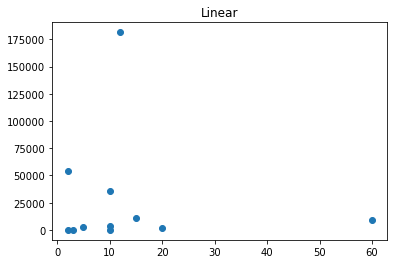

In [52]:
jobvsaving = plt.scatter(x,y)
plt.yscale('linear')
plt.title('Linear')

Text(0.5, 1.0, 'Log')

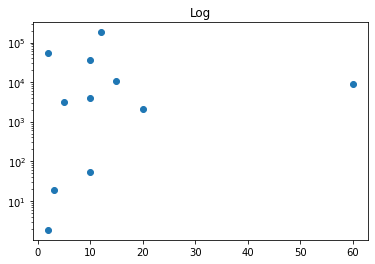

In [53]:
jobvsaving = plt.scatter(x,y)
plt.yscale('log')
plt.title('Log')

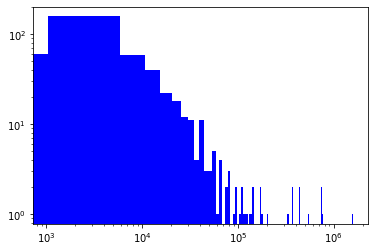

In [63]:
plt.hist(y,bins= 'auto',log='true',facecolor='b')
plt.xscale('log')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [67]:
df['Effective Date']

0      03/04/2005
1      04/02/2008
2      01/05/2015
3      02/03/2020
4      06/30/2017
          ...    
445    12/09/2008
446    12/05/2017
447    08/03/2018
448    01/26/2016
449    10/03/2019
Name: Effective Date, Length: 450, dtype: object

In [72]:
def first2(s):
    return s[:2]

In [73]:
df['Month'] = df['Effective Date'].apply(first2)

In [74]:
df['Month']

0      03
1      04
2      01
3      02
4      06
       ..
445    12
446    12
447    08
448    01
449    10
Name: Month, Length: 450, dtype: object

In [75]:
monthJobCreated=[]

In [87]:
test2 = df.groupby(['Month']).sum()

In [92]:
test2

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
Month,,,,,,,,,,,,,
01,425022,5148.0,0.0,4.0,1636975.56,14762104.69,1507.189909,-2735.605314,11216.0,894.0,79886.0,107242663.0,1.048498e+11
02,449558,2612.0,27.0,290.0,687503.49,7299118.59,1507.152057,-2735.596594,11090.0,995.0,86858.0,103745005.0,9.975810e+10
03,420921,4235.0,20.0,96.0,865753.18,12884844.13,1547.148797,-2809.947307,12091.0,1106.0,88633.0,125282728.0,1.200335e+11
04,411602,1861.0,2.0,5.0,701164.67,9141496.41,1302.624864,-2365.512611,10653.0,928.0,143450.0,111526249.0,1.060398e+11
05,280248,1680.0,2.0,516.0,427441.59,7325100.37,976.976865,-1774.758931,8312.0,766.0,8200.0,87243043.0,8.256157e+10
06,549026,6937.0,63.0,2993.0,2092370.66,22396322.48,1751.927855,-3179.079784,14078.0,1089.0,74088.0,142119080.0,1.369212e+11
07,704752,12741.0,20.0,54.0,5948439.66,77021807.05,2361.973480,-4288.779364,18015.0,1634.0,102568.0,180488020.0,1.732677e+11
08,343029,4855.0,0.0,0.0,2873982.77,7881849.35,1180.769672,-2144.488794,9207.0,832.0,57813.0,93054072.0,8.957366e+10
09,242774,2510.0,0.0,0.0,457315.99,8134214.76,692.116025,-1256.831375,5899.0,480.0,70176.0,62241230.0,5.867354e+10


TypeError: 'str' object is not callable

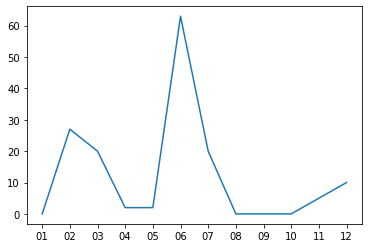

In [100]:
plt.plot(test2.index,test2['Job created'])
plt.title('Jobs created vs Month')
plt.ylabel('Jobs created')
plt.xlabel('Month')


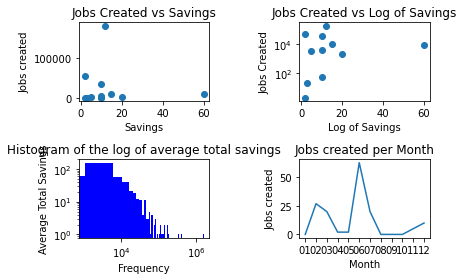

In [123]:
p1=plt.subplot(221)
p1.scatter(x,y)
p1.set_title('Jobs Created vs Savings')
p1.set_ylabel('Jobs created')
p1.set_xlabel('Savings')


p2=plt.subplot(222)
p2.scatter(x,y)
p2.set_yscale('log')
p2.set_title('Jobs Created vs Log of Savings')
p2.set_ylabel('Jobs Created')
p2.set_xlabel('Log of Savings')



p3=plt.subplot(223)
p3.hist(y,bins= 'auto',log='true',facecolor='b')
p3.set_xscale('log')
p3.set_title('Histogram of the log of average total savings')
p3.set_ylabel('Average Total Savings')
p3.set_xlabel('Frequency')



p4=plt.subplot(224)
p4.plot(test2.index,test2['Job created'])
p4.set_title('Jobs created per Month')
p4.set_ylabel('Jobs created')
p4.set_xlabel('Month')

plt.tight_layout(w_pad=5.0)
plt.show()